<a href="https://colab.research.google.com/github/vdtheone1/computer-vision/blob/master/connectomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:

from fastai.vision import *
from fastai.callbacks.hooks import *
import fastai

#from mask_functions import *

# Data 

In [ ]:
path_train_imaages=get_image_files("/content/drive/My Drive/data/data/membrane/train/image")
path_train_imaages[:3]

[PosixPath('/content/drive/My Drive/data/data/membrane/train/image/15.png'),
 PosixPath('/content/drive/My Drive/data/data/membrane/train/image/23.png'),
 PosixPath('/content/drive/My Drive/data/data/membrane/train/image/8.png')]

In [ ]:

path_train_labels=get_image_files("/content/drive/My Drive/data/data/membrane/train/label")
path_train_labels[:3]

[PosixPath('/content/drive/My Drive/data/data/membrane/train/label/4.png'),
 PosixPath('/content/drive/My Drive/data/data/membrane/train/label/16.png'),
 PosixPath('/content/drive/My Drive/data/data/membrane/train/label/20.png')]

#  lets  look into the image 

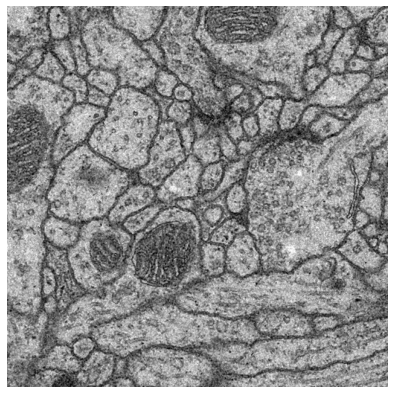

In [ ]:
image1=path_train_imaages[0]
img=open_image(image1)
img.show(figsize=(7,7))


/content/drive/My Drive/data/data/membrane/train/label/4.png


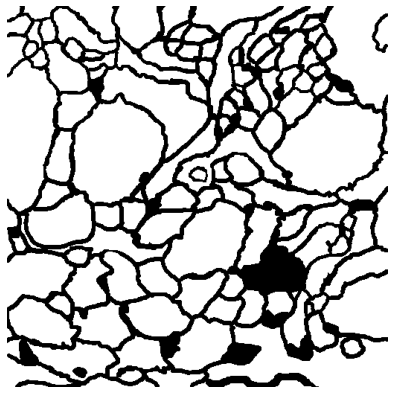

In [ ]:
label1=path_train_labels[0]
lbl=open_image(label1)
lbl.show(figsize=(7,7))
print(label1)

In [ ]:
path_lbl = "/content/drive/My Drive/data/data/membrane/train/label"
path_img = "/content/drive/My Drive/data/data/membrane/train/image"
test_path="/content/drive/My Drive/data/data/membrane/test"

In [ ]:
get_y_fn = lambda x: path_lbl+"/{0}{1}".format(x.stem,x.suffix)

In [ ]:
check_labels=get_y_fn(image1)

# Mask

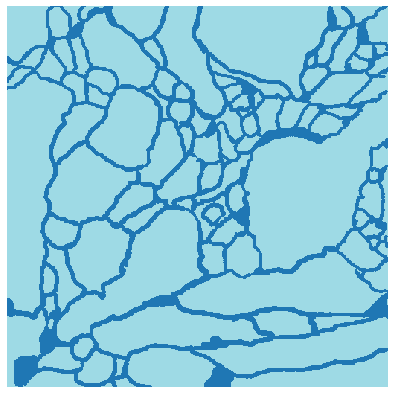

In [ ]:

lbl_check=open_mask(check_labels,convert_mode='L')
lbl_check.show(figsize=(7,7),alpha=1)


In [ ]:
lbl_check.data

tensor([[[255, 255, 255,  ...,   0,   0,   0],
         [255, 255, 255,  ...,   0,   0,   0],
         [255, 255, 255,  ...,   0,   0, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]])

#shape

In [ ]:
size=np.array(lbl_check.shape[1:])

In [ ]:
size = size//2
bs = 8


In [ ]:
size

array([256, 256])

# create the model

In [ ]:
class SegLabelListCustom(SegmentationLabelList):
        def open(self, fn): return open_mask(fn, div=True)

class SegItemListCustom(SegmentationItemList):
    _label_cls = SegLabelListCustom

In [ ]:
src = (SegItemListCustom.from_folder(path_img)
      .split_by_rand_pct(0.2,seed=55)
       .label_from_func(get_y_fn, classes=[255,0])
       #.add_test(test_path,label=None)
        )

In [ ]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .add_test_folder(test_path,label=None,tfm_y=False)
        .databunch(bs=bs)
        .normalize(mnist_stats))

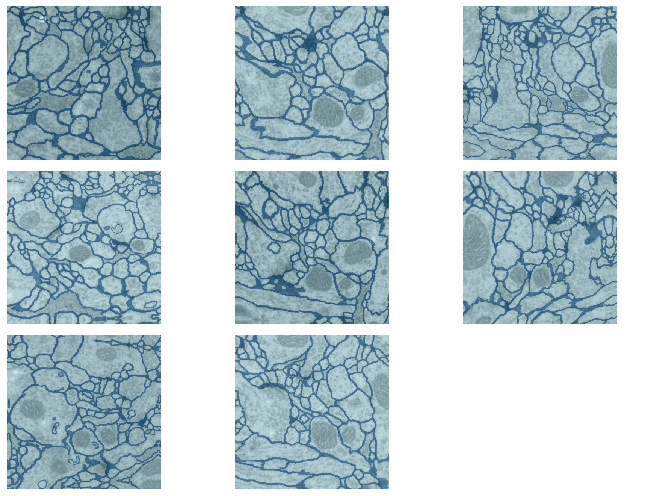

In [ ]:

data.show_batch(4, figsize=(10, 7))

In [ ]:

# create unet
learn = unet_learner(data, models.resnet18,metrics=[dice])

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [ ]:
lr = 1e-3

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


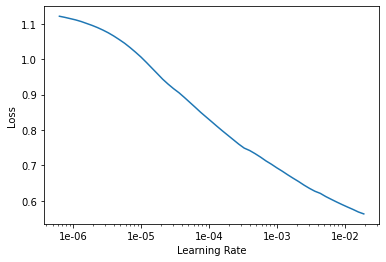

In [ ]:
lr_find(learn)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, slice(lr,lr/5))

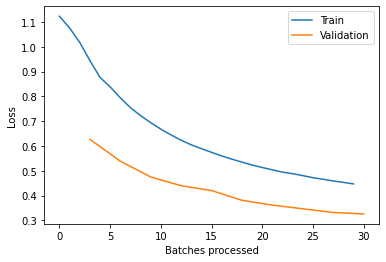

In [ ]:
learn.recorder.plot_losses()

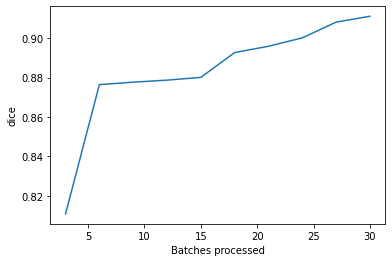

In [ ]:
learn.recorder.plot_metrics()

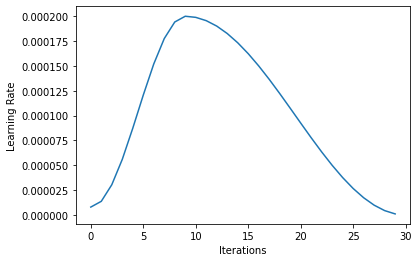

In [ ]:
learn.recorder.plot_lr()

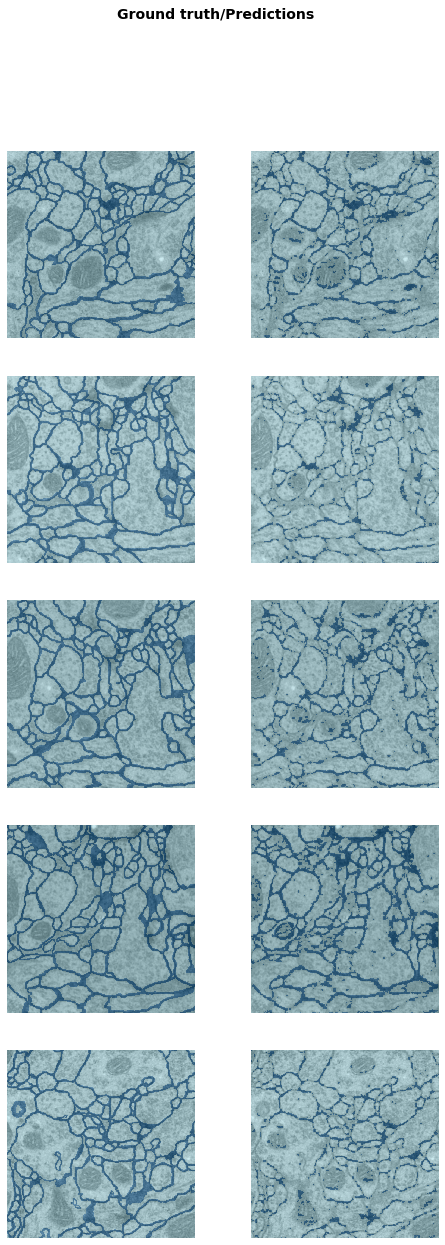

In [ ]:
learn.show_results()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


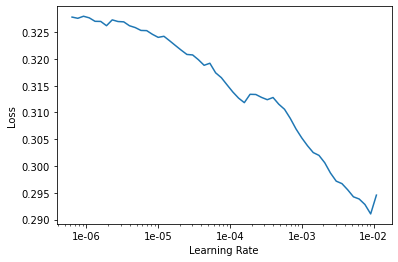

In [ ]:
learn.unfreeze()
lr_find(learn)
learn.recorder.plot()

In [ ]:

learn.fit_one_cycle(15, slice(1e-3,lr/5))

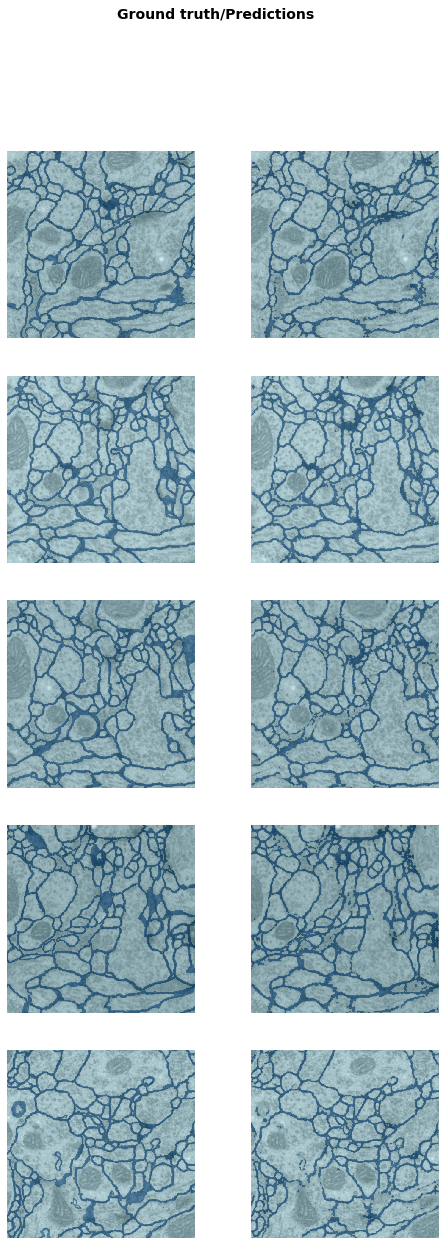

In [ ]:
learn.show_results()

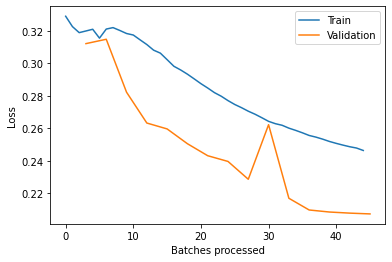

In [ ]:
learn.recorder.plot_losses()

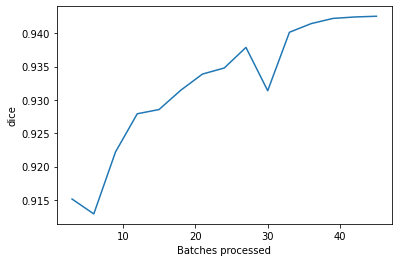

In [ ]:
learn.recorder.plot_metrics()

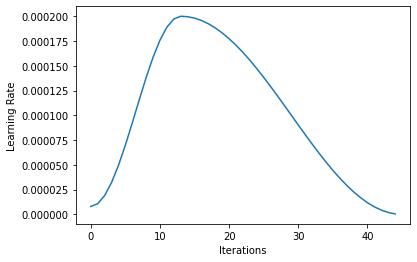

In [ ]:
learn.recorder.plot_lr()

In [ ]:
learn.save('connect1')

# Full sized image

In [ ]:
size=np.array(lbl_check.shape[1:])
print(size)
bs = 4

[512 512]


In [ ]:
class SegLabelListCustom(SegmentationLabelList):
        def open(self, fn): return open_mask(fn, div=True)

class SegItemListCustom(SegmentationItemList):
    _label_cls = SegLabelListCustom

In [ ]:
.add_test(ImageItemList.from_folder(...)

In [ ]:
src = (SegItemListCustom.from_folder(path_img)
      .split_by_rand_pct(0.2,seed=55)
       .label_from_func(get_y_fn, classes=[255,0])
      # .add_test(SegItemListCustom.from_file(path_img), label=None)
        )

In [ ]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .add_test_folder(test_path,label=None,tfm_y=False)
        .databunch(bs=bs)
        .normalize(mnist_stats))

In [ ]:
# create unet
learn = unet_learner(data, models.resnet18,metrics=[dice])

In [ ]:
learn.fit_one_cycle(10, slice(lr,lr/5))

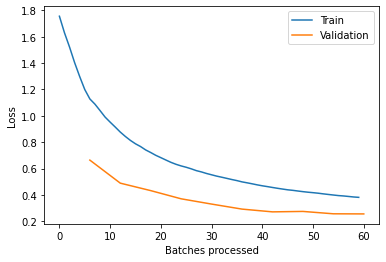

In [ ]:
learn.recorder.plot_losses()

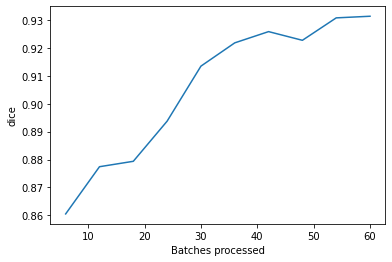

In [ ]:
learn.recorder.plot_metrics()

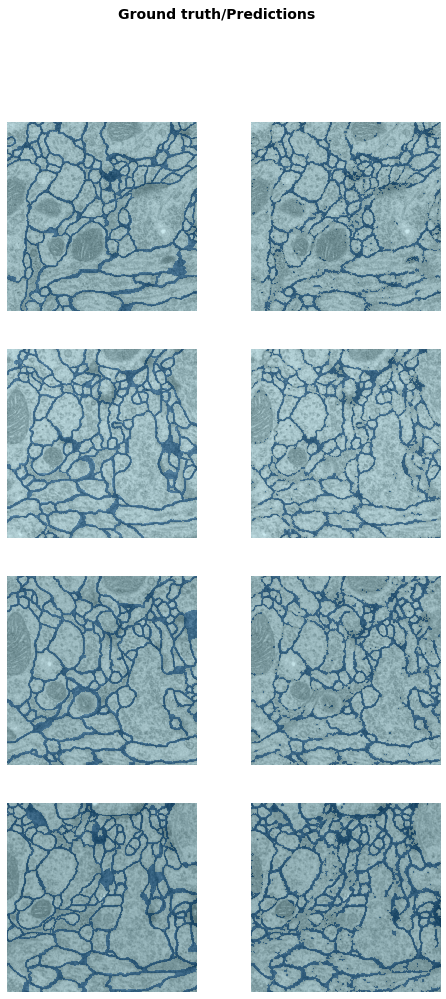

In [ ]:
learn.show_results()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(15, slice(lr,lr/5))

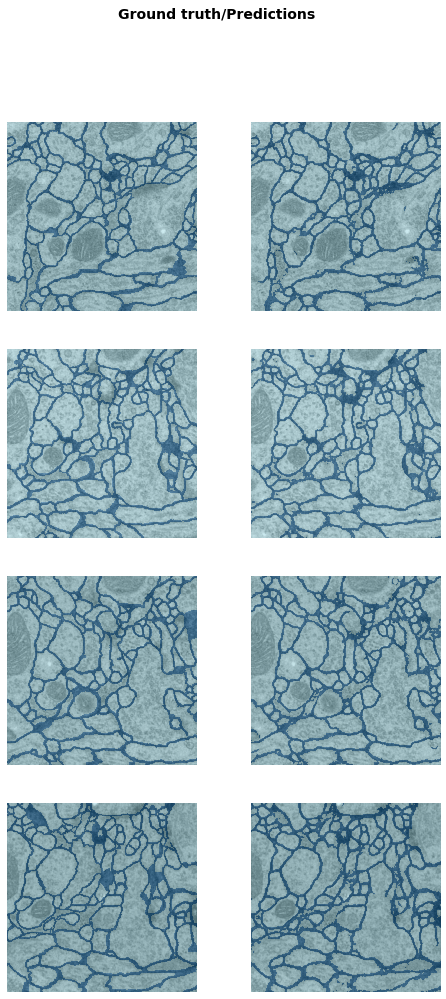

In [ ]:
learn.show_results()

In [ ]:
learn.save('connect2')

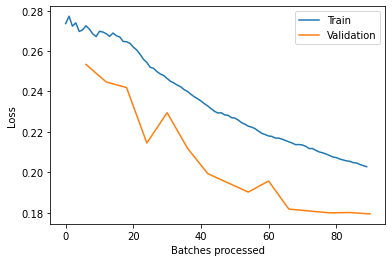

In [ ]:
learn.recorder.plot_losses()

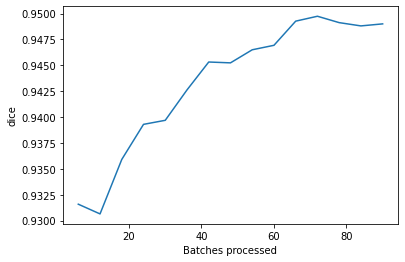

In [ ]:
learn.recorder.plot_metrics()

In [ ]:
learn.summary()

DynamicUnet
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 256, 256]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 256, 256]       128        True      
______________________________________________________________________
ReLU                 [64, 256, 256]       0          False     
______________________________________________________________________
MaxPool2d            [64, 128, 128]       0          False     
______________________________________________________________________
Conv2d               [64, 128, 128]       36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
__________________________________________________

# Prediction

In [ ]:
t_preds = learn.get_preds(DatasetType.Test)

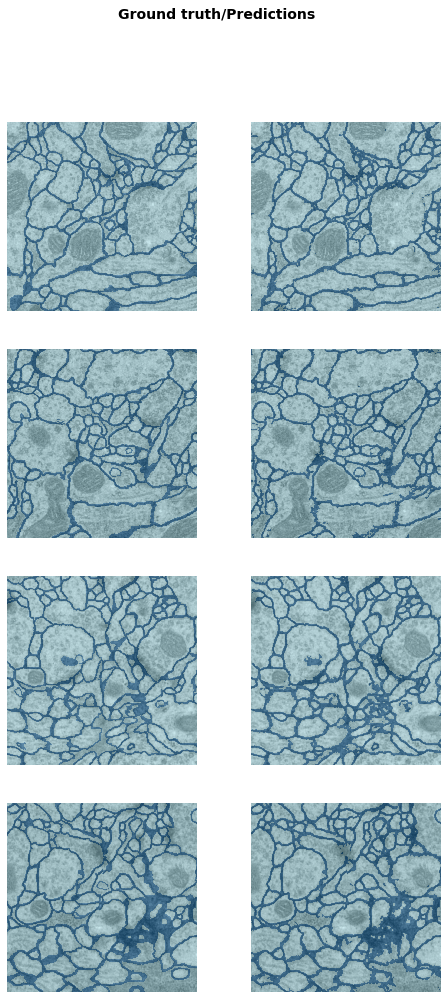

In [ ]:
learn.show_results(t_preds)